In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.utils as utils

In [3]:
import glob

data_files = glob.glob('data/pieman_data/*.nii')

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(data_files, num_factors=10)

In [6]:
prior_sample, _ = htfa.sample(posterior_predictive=False)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            prior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

prior_sample

03/26/2018 10:48:30 Prior Reconstruction Error (Frobenius Norm) for subject 0: 5.34340527e+03
03/26/2018 10:48:30 Prior Reconstruction Error (Frobenius Norm) for subject 1: 5.37762109e+03
03/26/2018 10:48:30 Prior Reconstruction Error (Frobenius Norm) for subject 2: 5.52468311e+03


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 10x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 10x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 10]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 10]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 10]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 10]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 10]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 10]), 'voxel_noise': Normal([torch.FloatTensor of size 3]), 'subject_weights_mu': Normal([torch.FloatTensor of size 3x10]), 'subject_weights_sigma': Normal([torch.FloatTensor of size 3x10]), 'Weights0': Normal([torch.FloatTensor of size 300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 10]), 'Weights1': Normal([torch.FloatTensor of size 300

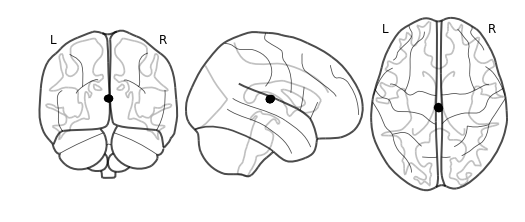

In [7]:
htfa.plot_factor_centers(trace=prior_sample)

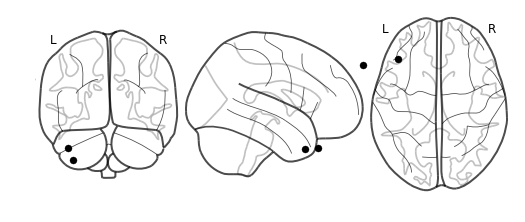

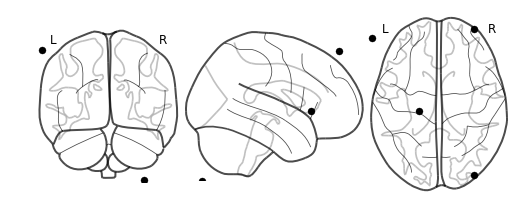

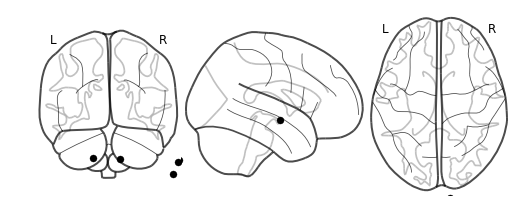

In [8]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=prior_sample)

In [9]:
del prior_sample

In [10]:
variational_sample, _ = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            variational_sample['Y%d' % s].value.data.cpu().numpy() -
            htfa.voxel_activations[s].numpy()
        )
    )

variational_sample

03/26/2018 10:48:37 Prior Reconstruction Error (Frobenius Norm) for subject 0: 5.34319336e+03
03/26/2018 10:48:37 Prior Reconstruction Error (Frobenius Norm) for subject 1: 5.37783936e+03
03/26/2018 10:48:37 Prior Reconstruction Error (Frobenius Norm) for subject 2: 5.52487354e+03


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 1x10]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 1x10]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 1x10]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 1x10]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 1x10]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 1x10]), 'voxel_noise': Normal([torch.FloatTensor of size 1x3]), 'subject_weights_mu': Normal([torch.FloatTensor of size 1x3x10]), 'subject_weights_sigma': Normal([torch.FloatTensor of size 1x3x10]), 'Weights0': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x10]), 'Weights1': Normal([t

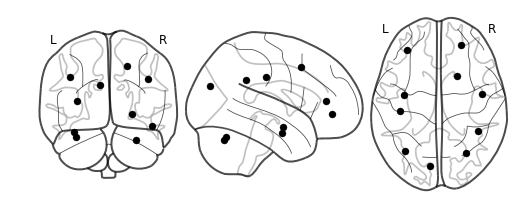

In [11]:
htfa.plot_factor_centers(trace=variational_sample)

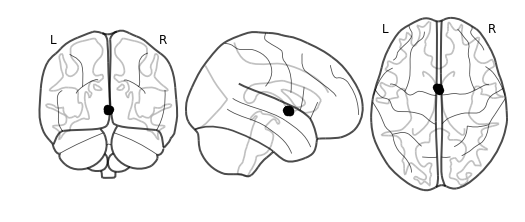

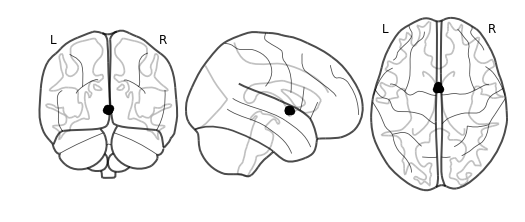

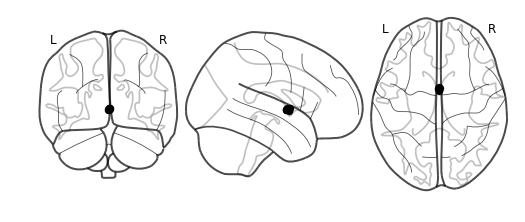

In [12]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=variational_sample)

In [13]:
del variational_sample

In [15]:
losses = htfa.train(num_steps=2000, learning_rate=1e-1, log_level=logging.INFO, num_particles=4,
                    use_cuda=True)

03/26/2018 10:48:53 [Epoch 1] (292ms) Posterior free-energy 4.24793139e+09
03/26/2018 10:48:53 [Epoch 2] (268ms) Posterior free-energy 4.23990784e+09
03/26/2018 10:48:53 [Epoch 3] (266ms) Posterior free-energy 4.23759821e+09
03/26/2018 10:48:54 [Epoch 4] (263ms) Posterior free-energy 4.24034406e+09
03/26/2018 10:48:54 [Epoch 5] (267ms) Posterior free-energy 4.23910784e+09
03/26/2018 10:48:54 [Epoch 6] (266ms) Posterior free-energy 4.80969421e+09
03/26/2018 10:48:54 [Epoch 7] (269ms) Posterior free-energy 4.24946432e+09
03/26/2018 10:48:55 [Epoch 8] (267ms) Posterior free-energy 4.23772237e+09
03/26/2018 10:48:55 [Epoch 9] (263ms) Posterior free-energy 4.23991936e+09
03/26/2018 10:48:55 [Epoch 10] (267ms) Posterior free-energy 4.23687322e+09
03/26/2018 10:48:55 [Epoch 11] (267ms) Posterior free-energy 4.23756032e+09
03/26/2018 10:48:56 [Epoch 12] (266ms) Posterior free-energy 4.23904819e+09
03/26/2018 10:48:56 [Epoch 13] (266ms) Posterior free-energy 4.23756058e+09
03/26/2018 10:48:56 [

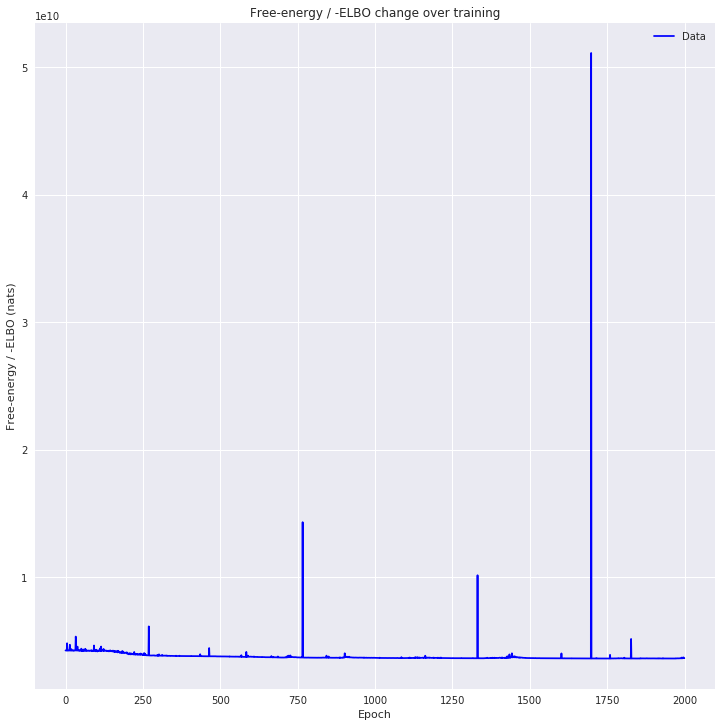

In [16]:
utils.plot_losses(losses)

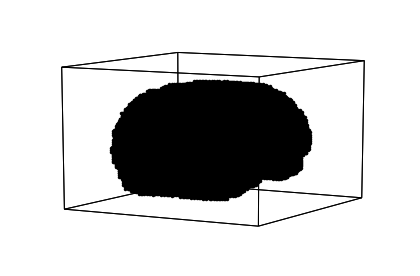

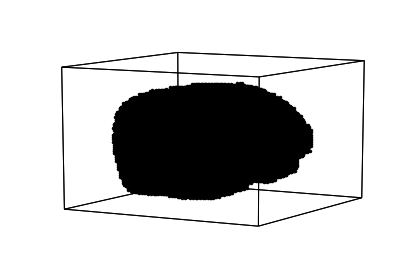

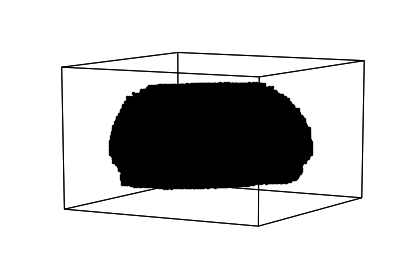

In [17]:
htfa.plot_voxels()

In [18]:
posterior_sample, q = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Posterior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            posterior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

posterior_sample

03/26/2018 11:00:27 Posterior Reconstruction Error (Frobenius Norm) for subject 0: 4.99354883e+03
03/26/2018 11:00:27 Posterior Reconstruction Error (Frobenius Norm) for subject 1: 5.05816699e+03
03/26/2018 11:00:27 Posterior Reconstruction Error (Frobenius Norm) for subject 2: 5.14999658e+03


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 1x10]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 1x10]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 1x10]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 1x10]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 1x10]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 1x10]), 'voxel_noise': Normal([torch.FloatTensor of size 1x3]), 'subject_weights_mu': Normal([torch.FloatTensor of size 1x3x10]), 'subject_weights_sigma': Normal([torch.FloatTensor of size 1x3x10]), 'Weights0': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x10]), 'Weights1': Normal([t

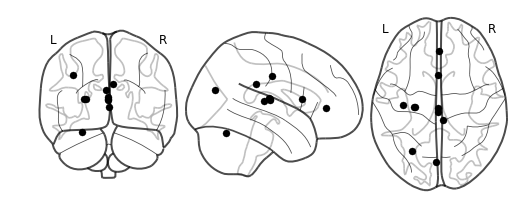

In [19]:
htfa.plot_factor_centers(trace=posterior_sample)

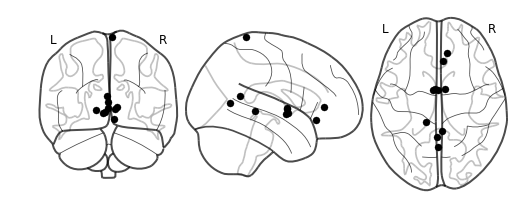

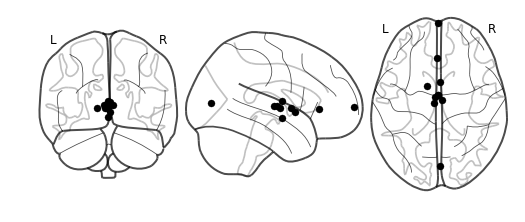

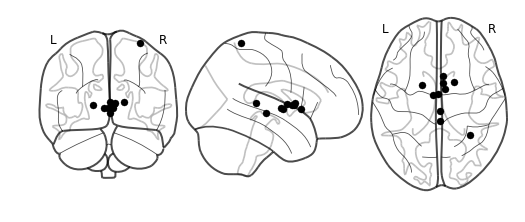

In [20]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=posterior_sample)